Name: Sricharan Koride
Github Username:sricharan-koride
USC ID:2343517466

In [369]:
from scipy.io import arff
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
import numpy as np
import warnings; warnings.simplefilter('ignore')
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
import math
from numpy.linalg import inv

In [370]:
data, meta = arff.loadarff('../data/column_2C_weka.arff')
df = pd.DataFrame(data)
df['class'] = df['class'].map({b'Normal': 0, b'Abnormal': 1})

1(b)(i) scatterplots of the independent variables in the dataset

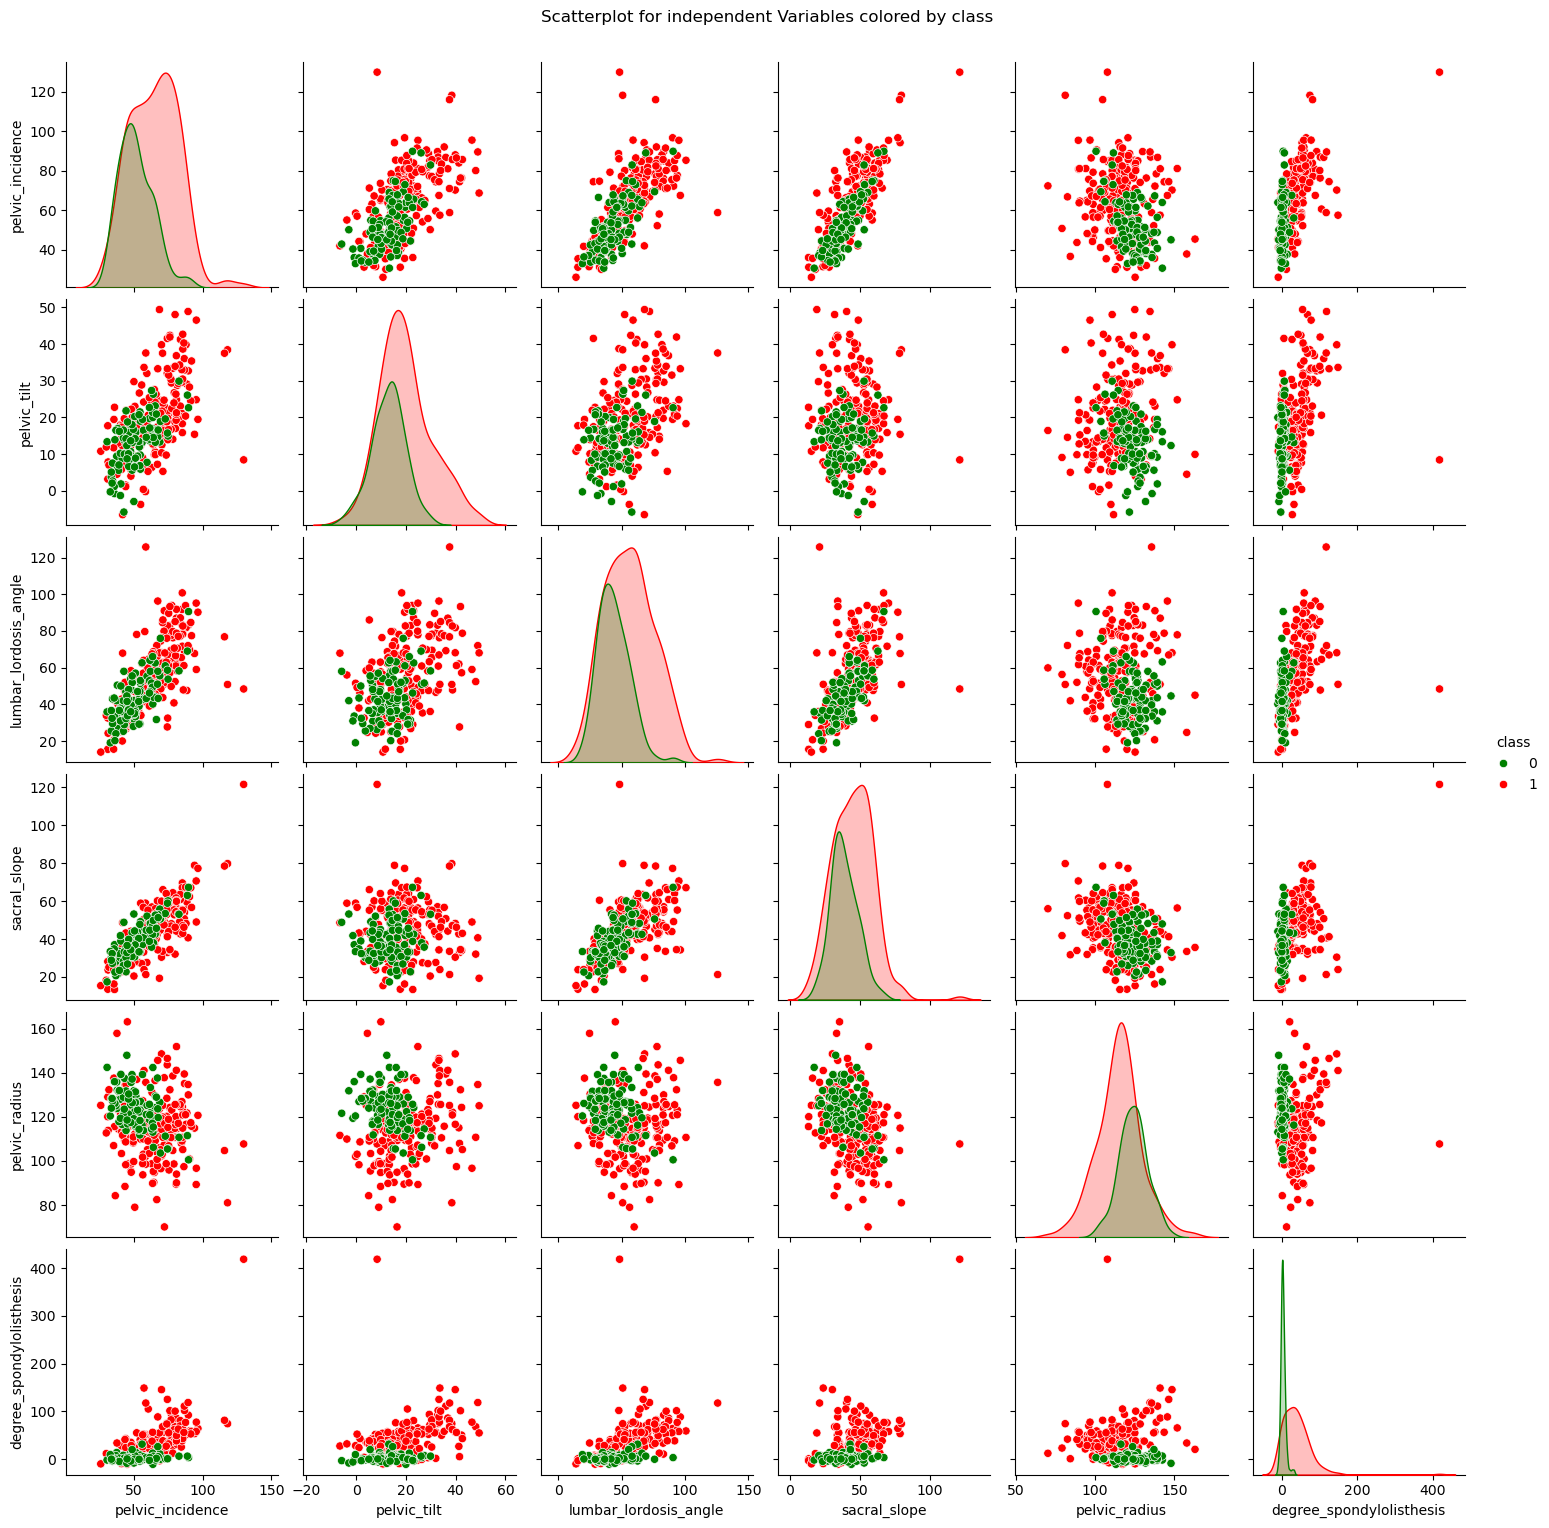

In [372]:
sb.pairplot(df, hue='class', palette={0: 'green', 1: 'red'})
plt.suptitle('Scatterplot for independent Variables colored by class', y = 1.02) 
plt.show()

1(b)(iii)boxplots for each of the independent variable

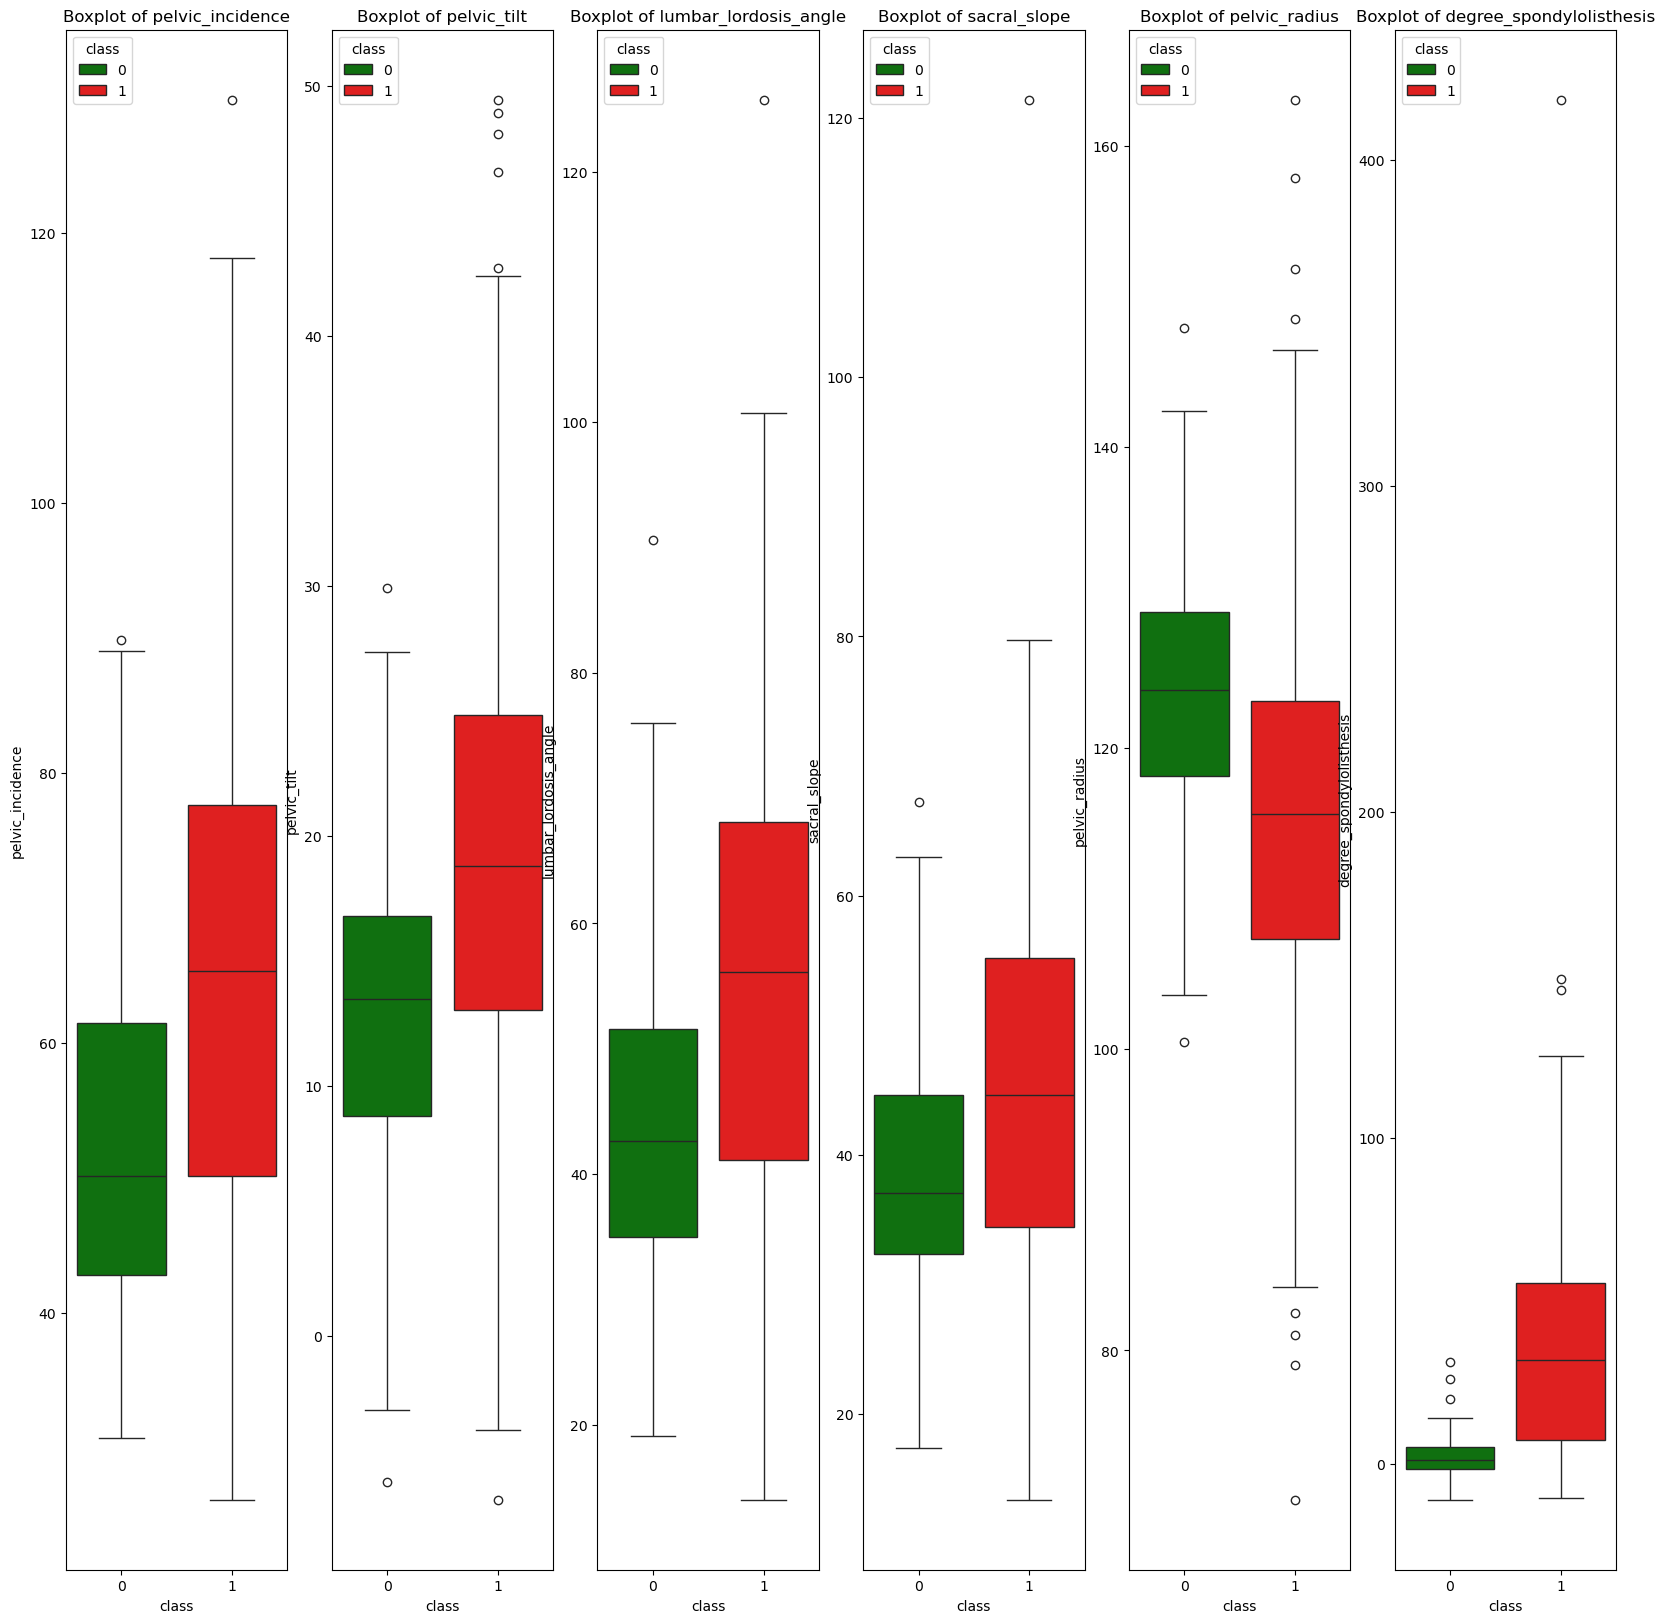

In [374]:
plt.figure(figsize=(20, 20))
for i, feature in enumerate(df.columns[0:6], 1):
    plt.subplot(1, len(df.columns[0:6]), i) 
    sb.boxplot(x='class', y=feature, data=df, hue='class',palette={0: 'green', 1: 'red'})
    plt.title(f'Boxplot of {feature}')


plt.show()

1(b)(iii) extracting training and testing data 

In [376]:
zero_class, one_class = df[df['class'] == 0], df[df['class'] == 1]
train_data = pd.concat([zero_class.iloc[:70], one_class.iloc[:140]])
test_data = pd.concat([zero_class.iloc[70:], one_class.iloc[140:]])

1(c)(i)

In [378]:
X_train, X_test, Y_train, Y_test = train_data[train_data.columns[0:6]].values, test_data[test_data.columns[0:6]].values, train_data[train_data.columns[6:]].values, test_data[test_data.columns[6:]].values
knn_classifier = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
knn_classifier.fit(X_train, Y_train)
Y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)

1(c)(ii) From the graph produced below, we can see that the test error significantly increases after 100, any value greater than that leads to overfitting.
By observing acccuracies at all k, it is highest at k=4. So that is the ideal value of k.
wE calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score for k = 4

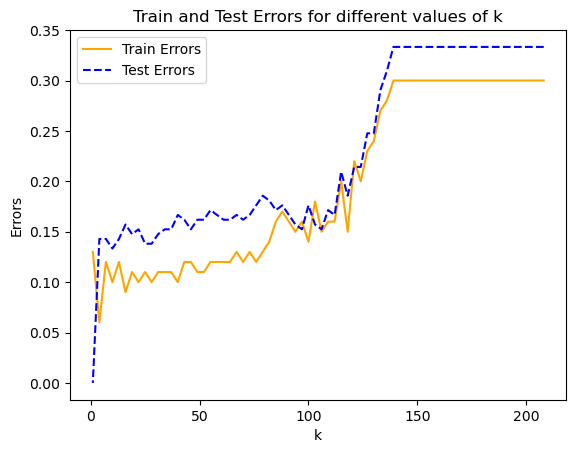

test error:0.06000000000000005
WITH K=4


              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100

[[25  5]
 [ 1 69]]


tpr: 0.9857142857142858 tnr:0.8333333333333334


In [380]:
test_error_metrics=[] #to store all test errors for last question
train_errors = []
test_errors = []
test_accuracies = []
for k in range(208, 0, -3):
    knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_classifier.fit(X_train, Y_train)
    Y_train_pred = knn_classifier.predict(X_train)
    Y_test_pred = knn_classifier.predict(X_test)
    accuracy_train = accuracy_score(Y_test, Y_test_pred)
    train_error = 1 - accuracy_train
    accuracy_test = accuracy_score(Y_train, Y_train_pred)
    test_accuracies.append(accuracy_test)
    test_error = 1 - accuracy_test
    train_errors.append(train_error)
    test_errors.append(test_error)

plt.plot(range(208, 0, -3), train_errors, label='Train Errors', color='orange')
plt.plot(range(208, 0, -3), test_errors, label='Test Errors', color='blue', linestyle='dashed')



plt.xlabel('k')
plt.ylabel('Errors')
plt.title('Train and Test Errors for different values of k')
plt.legend()
plt.show()

#FOR K=4
knn = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
knn.fit(X_train,Y_train)
pred = knn.predict(X_test)
accuracy_test = accuracy_score(Y_test, pred)
test_error = 1 - accuracy_test
test_error_metrics.append(test_error)
print('test error:{}'.format(test_error))
print('WITH K={}'.format(4))
print('\n')
print(classification_report(Y_test,pred))
print(confusion_matrix(Y_test,pred))
print('\n')
confusion_matrix = confusion_matrix(Y_test,pred)
true_negative, false_positive, false_negative, true_positive = confusion_matrix.ravel()
true_positive_rate = true_positive / (true_positive + false_negative)
true_negative_rate = true_negative / (true_negative + false_positive)
print('tpr: {} tnr:{}'.format(true_positive_rate, true_negative_rate))


1(c)(iii)

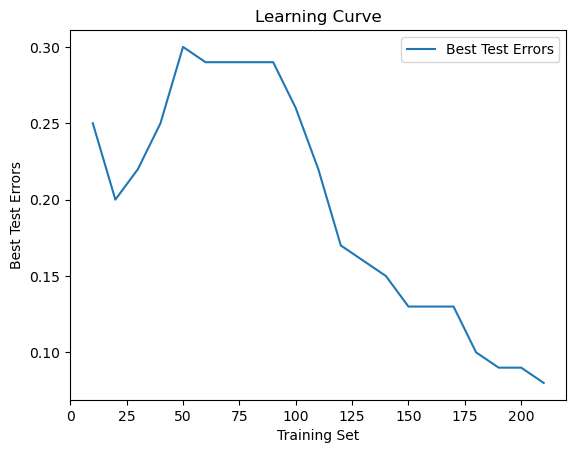

In [382]:
training_zero = zero_class.iloc[:70]
training_one = one_class.iloc[:140]
best_test_errors = []
for n in range(10, 211, 10):
    train_data_new = pd.concat([training_zero.iloc[:70].iloc[:math.floor(n/3)],training_one.iloc[:140].iloc[:n-math.floor(n/3)]])
    X_train, X_test, Y_train, Y_test = train_data_new[train_data_new.columns[0:6]].values, test_data[test_data.columns[0:6]].values, train_data_new[train_data_new.columns[6:]].values, test_data[test_data.columns[6:]].values
    knn_classifier = KNeighborsClassifier(n_neighbors=n,metric='euclidean')
    knn_classifier.fit(X_train, Y_train)
    Y_pred = knn_classifier.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)

    best_test_error =float('inf')
    for k in range(1, n, 5):
        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        knn_classifier.fit(X_train, Y_train)
        Y_pred = knn_classifier.predict(X_test)
        test_error = 1 - accuracy_score(Y_test, Y_pred)
        if test_error < best_test_error:
            best_k = k
            best_test_error = test_error
    best_test_errors.append(best_test_error)
plt.plot(range(10, 211, 10), best_test_errors, label='Best Test Errors')
plt.xlabel('Training Set')
plt.ylabel('Best Test Errors')
plt.title('Learning Curve')
plt.legend()
plt.show()

1(d)(i)A. from the graph, lowest error rate is at k = 6 for manhattan (minkowski with p = 1), which is our ideal k
although the same test error rate occurs at 4 values of k

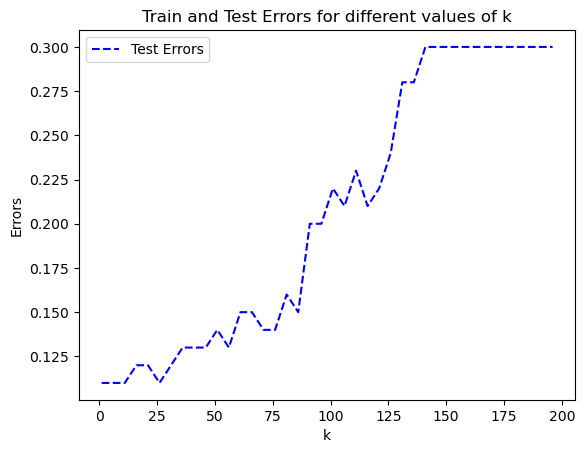

test error 0.10999999999999999
   k_value  test_error
0        1        0.11
1        6        0.11
2       11        0.11
3       26        0.11


In [384]:
test_errors = []
test_accuracies = []
for k in range(1, 197, 5):
    knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    knn_classifier.fit(X_train, Y_train)
    Y_test_pred = knn_classifier.predict(X_test)
    accuracy_test = accuracy_score(Y_test, Y_test_pred)
    test_accuracies.append(accuracy_test)
    test_error = 1 - accuracy_test
    test_errors.append(test_error)

plt.plot(range(1, 197, 5), test_errors, label='Test Errors', color='blue', linestyle='dashed')
plt.xlabel('k')
plt.ylabel('Errors')
plt.title('Train and Test Errors for different values of k')
plt.legend()
plt.show()
test_error_metrics.append(test_errors[1])
print('test error {}'.format(test_errors[1]))

l = []
k_values = range(1, 197, 5)
k_stars = []
for i in range(len(test_errors)):
    if(test_errors[i] == 0.10999999999999999):
        l.append(test_errors[i])
        k_stars.append(k_values[i])
k_table = pd.DataFrame({
    'k_value': k_stars,
    'test_error': l
})

print(k_table)


1(d)(i)B. based on the graph, the best log10(p) is 0.67 for the k =6 from previous sum

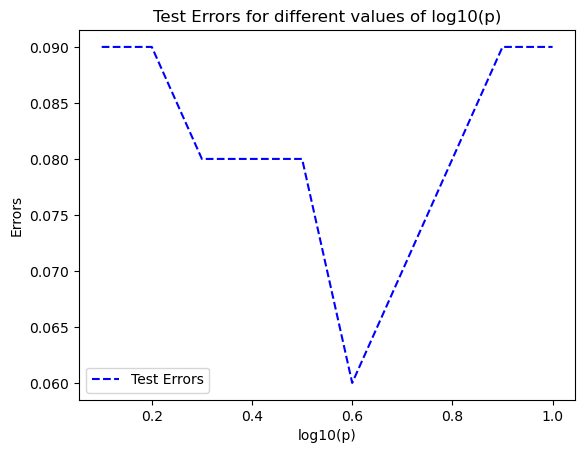

test error 0.06000000000000005


In [386]:


test_errors = []
test_accuracies = []
for i in [x / 10 for x in range(1, 11)]:
    knn_classifier = KNeighborsClassifier(n_neighbors=6, metric='minkowski', p=math.pow(10,i))
    knn_classifier.fit(X_train, Y_train)
    Y_test_pred = knn_classifier.predict(X_test)
    accuracy_test = accuracy_score(Y_test, Y_test_pred)
    test_accuracies.append(accuracy_test)
    test_error = 1 - accuracy_test
    test_errors.append(test_error)
    

plt.plot([x / 10 for x in range(1, 11)], test_errors, label='Test Errors', color='blue', linestyle='dashed')



plt.xlabel('log10(p)')
plt.ylabel('Errors')
plt.title('Test Errors for different values of log10(p)')
plt.legend()
plt.show()
test_error_metrics.append(test_errors[5])
print('test error {}'.format(test_errors[5]))

1(d)(i)C. For chebyeshev, the lowest error rate comes at k = 16

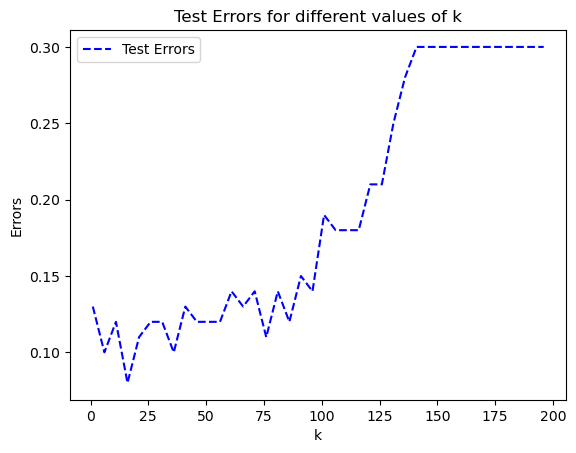

test error 0.07999999999999996


In [388]:
test_errors = []
test_accuracies = []
for k in range(1, 197, 5):
    knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn_classifier.fit(X_train, Y_train)
    Y_test_pred = knn_classifier.predict(X_test)
    accuracy_test = accuracy_score(Y_test, Y_test_pred)
    test_accuracies.append(accuracy_test)
    test_error = 1 - accuracy_test
    test_errors.append(test_error)

plt.plot(range(1, 197, 5), test_errors, label='Test Errors', color='blue', linestyle='dashed')
plt.xlabel('k')
plt.ylabel('Errors')
plt.title('Test Errors for different values of k')
plt.legend()
plt.show()
test_error_metrics.append(test_errors[3])
print('test error {}'.format(test_errors[3]))

1(d)(ii)observing the graph, lowest test error occurs at k = 6 for mahalanobis

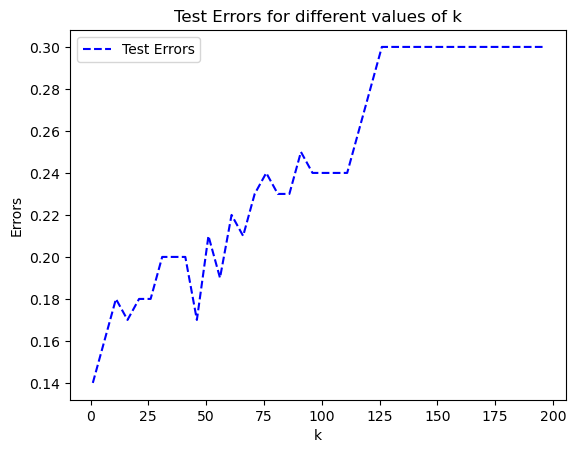

test error 0.16000000000000003


In [390]:
test_errors = []
test_accuracies = []
cov_matrix = np.cov(X_train.T)
inv_cov_matrix = inv(cov_matrix)
for k in range(1, 197, 5):

    knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI': inv_cov_matrix})
    knn_classifier.fit(X_train, Y_train)
    Y_test_pred = knn_classifier.predict(X_test)
    accuracy_test = accuracy_score(Y_test, Y_test_pred)
    test_accuracies.append(accuracy_test)
    test_error = 1 - accuracy_test
    test_errors.append(test_error)

plt.plot(range(1, 197, 5), test_errors, label='Test Errors', color='blue', linestyle='dashed')
plt.xlabel('k')
plt.ylabel('Errors')
plt.title('Test Errors for different values of k')
plt.legend()
plt.show()
test_error_metrics.append(test_errors[1])
print('test error {}'.format(test_errors[1]))

1(e) weighted decision for euclidean.

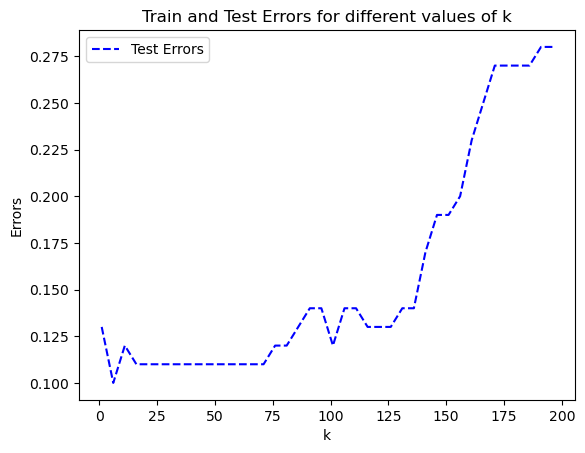

test error 0.09999999999999998


In [392]:
test_errors = []
test_accuracies = []
for k in range(1, 197, 5):
    knn_classifier = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='euclidean')
    knn_classifier.fit(X_train, Y_train)
    Y_test_pred = knn_classifier.predict(X_test)
    accuracy_test = accuracy_score(Y_test, Y_test_pred)
    test_accuracies.append(accuracy_test)
    test_error = 1 - accuracy_test
    test_errors.append(test_error)

plt.plot(range(1, 197, 5), test_errors, label='Test Errors', color='blue', linestyle='dashed')
plt.xlabel('k')
plt.ylabel('Errors')
plt.title('Train and Test Errors for different values of k')
plt.legend()
plt.show()
test_error_metrics.append(test_errors[1])
print('test error {}'.format(test_errors[1]))

1(e) weighted decision for manhattan.

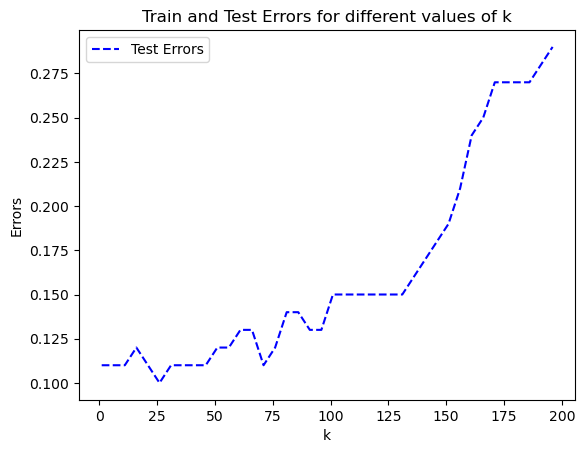

test error:  0.09999999999999998


In [394]:
test_errors = []
test_accuracies = []
for k in range(1, 197, 5):
    knn_classifier = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='manhattan')
    knn_classifier.fit(X_train, Y_train)
    Y_test_pred = knn_classifier.predict(X_test)
    accuracy_test = accuracy_score(Y_test, Y_test_pred)
    test_accuracies.append(accuracy_test)
    test_error = 1 - accuracy_test
    test_errors.append(test_error)

plt.plot(range(1, 197, 5), test_errors, label='Test Errors', color='blue', linestyle='dashed')
plt.xlabel('k')
plt.ylabel('Errors')
plt.title('Train and Test Errors for different values of k')
plt.legend()
plt.show()
test_error_metrics.append(test_errors[5])
print('test error:  {}'.format(test_errors[5]))

1(e) weighted decision for Chebyeshev.

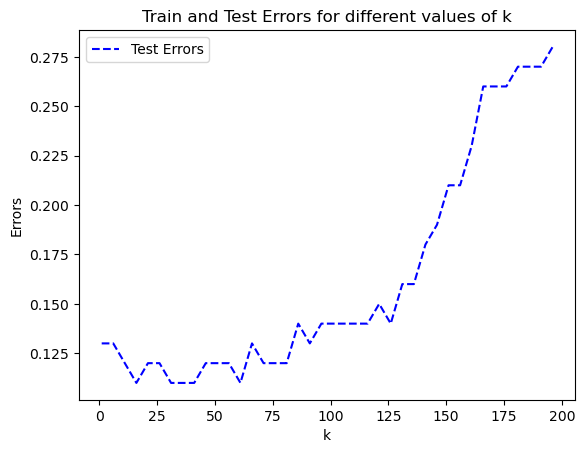

test error 0.10999999999999999
   k_value  test_error
0       16        0.11
1       31        0.11
2       36        0.11
3       41        0.11
4       61        0.11


In [396]:
test_errors = []
test_accuracies = []
for k in range(1, 197, 5):
    knn_classifier = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='chebyshev')
    knn_classifier.fit(X_train, Y_train)
    Y_test_pred = knn_classifier.predict(X_test)
    accuracy_test = accuracy_score(Y_test, Y_test_pred)
    test_accuracies.append(accuracy_test)
    test_error = 1 - accuracy_test
    test_errors.append(test_error)

plt.plot(range(1, 197, 5), test_errors, label='Test Errors', color='blue', linestyle='dashed')
plt.xlabel('k')
plt.ylabel('Errors')
plt.title('Train and Test Errors for different values of k')
plt.legend()
plt.show()
test_error_metrics.append(test_errors[3])
print('test error {}'.format(test_errors[3]))

l = []
k_values = range(1, 197, 5)
k_stars = []
for i in range(len(test_errors)):
    if(test_errors[i] == 0.10999999999999999):
        l.append(test_errors[i])
        k_stars.append(k_values[i])
k_table = pd.DataFrame({
    'k_value': k_stars,
    'test_error': l
})

print(k_table)

1(f) minimum test error rate

In [398]:
print('minimum test error in various KNNs : {}'.format(min(test_error_metrics)))

minimum test error in various KNNs : 0.06000000000000005


Sources used 
1) https://stackoverflow.com/questions/52687493/find-the-training-and-test-error-in-my-self-implemented-knn-algorithm
2) https://medium.com/analytics-vidhya/understanding-k-nearest-neighbour-algorithm-in-detail-fc9649c1d196
3) https://datascienceplus.com/k-nearest-neighbors-knn-with-python/
4) generative AI used as copilot